In [202]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc

In [203]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300
# rcParams['font.family'] = 'Lucida Bright'
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Text(0.5, 1.0, 'Box model - Inundation peak time lag')

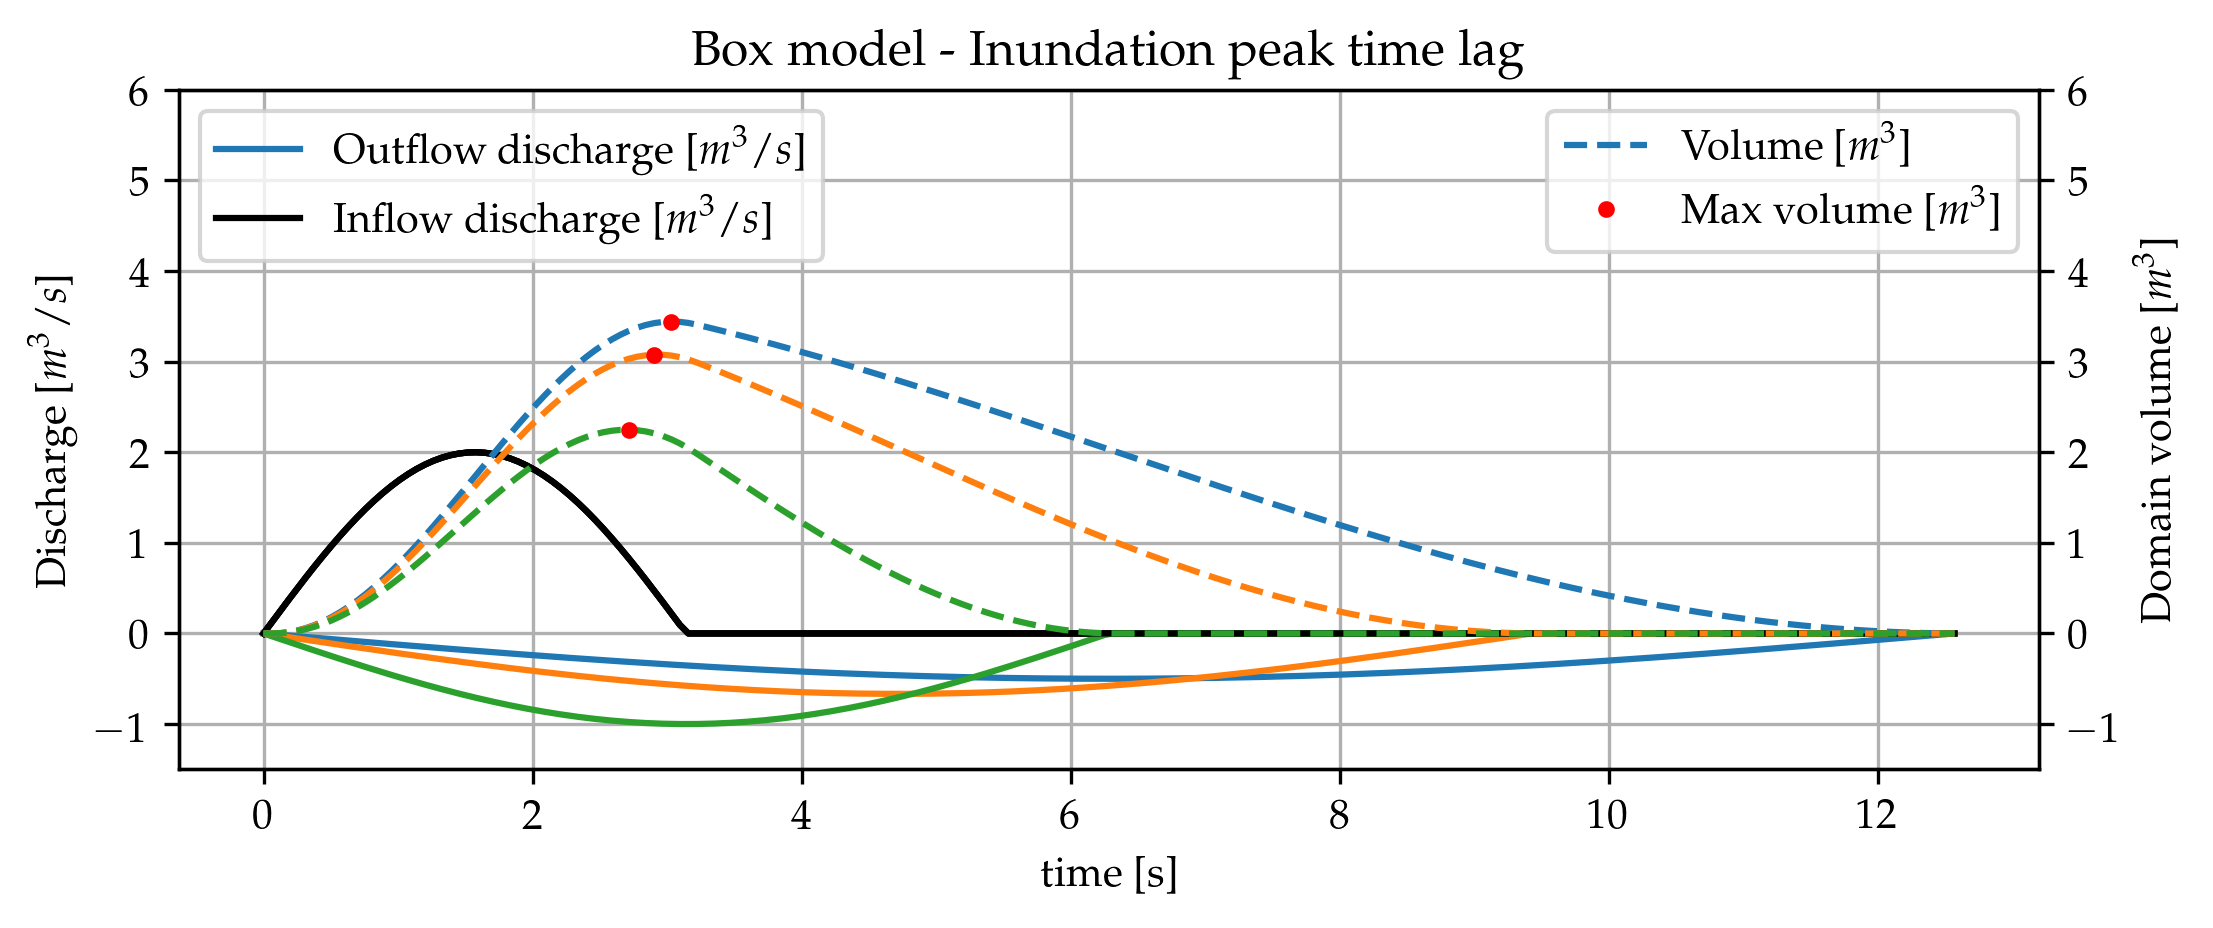

In [215]:
x = np.linspace(0,4*np.pi,200)
c = np.flip(np.linspace(.5,2,4))[:-1]

fig, ax1 = plt.subplots(figsize=[8,3])
ax2 = ax1.twinx()
ax1.set_ylim([-1.5, 6])
ax2.set_ylim([-1.5, 6])

for j in range(len(c)):
    y1 = np.zeros(len(x))
    y1[:int(len(x)/2*c[j])] = (-np.sin(x/2/c[j])/c[j])[:int(len(x)/2*c[j])]
    y2 = np.zeros(len(x))
    y2[:50] = np.sin(x[:50])*2
#     y2[25-5:25+5] = y2[25-5:25+5]+1

    ax1.plot(x, y1,color=plt.get_cmap('tab10')(j))
    ax1.plot(x, y2,color='k')
    V = np.zeros(len(x))
    for i in range(len(x)):
        V[i] = np.trapz((y1+y2)[:i],x[:i])
    ax2.plot(x,V,color=plt.get_cmap('tab10')(j),ls='--')
    ax2.plot(x[list(V).index(max(V))], (V)[list(V).index(max(V))], 'r.')

ax1.legend(['Outflow discharge [$m^3/s$]','Inflow discharge [$m^3/s$]'],loc='upper left')
ax2.legend(['Volume [$m^3$]','Max volume [$m^3$]'])
ax1.set_ylabel('Discharge [$m^3/s$]')
ax2.set_ylabel('Domain volume [$m^3$]')
ax1.grid()
ax1.set_xlabel('time [s]')
plt.title("Box model - Inundation peak time lag")

In [105]:
np.isclose(-np.trapz(y1,x), np.trapz(y2,x),rtol=1e-03)

True

In [133]:
for c in np.arange(.5,4,100):
    print(c)

0.5


In [148]:
plt.get_cmap('tab10')(.5)

(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)